In [1]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.losses import categorical_crossentropy

def VGG19(input_shape, class_num):
    """
    Creates a VGG19 model with the given input shape and number of classes.

    Parameters:
    input_shape (tuple): The shape of the input data (height, width, channels).
    class_num (int): The number of classes.

    Returns:
    keras.models.Sequential: The VGG19 model.
    """

    model = Sequential()

    #Convolution Layers
    model.add(Conv2D(64, kernel_size=(3,3), padding= 'same',
                        activation= 'relu', input_shape= input_shape))
    model.add(Conv2D(64, kernel_size=(3,3), padding= 'same',
                    activation= 'relu'))

    #Pooling Layer
    model.add(MaxPooling2D(pool_size=(2,2), strides= (2,2)))


    #Convolution Layers
    model.add(Conv2D(128, kernel_size=(3,3), padding= 'same',
                    activation= 'relu'))
    model.add(Conv2D(128, kernel_size=(3,3), padding= 'same',
                    activation= 'relu'))

    #Pooling Layer
    model.add(MaxPooling2D(pool_size=(2,2), strides= (2,2)))

    #Convolution Layers
    model.add(Conv2D(256, kernel_size=(3,3), padding= 'same',
                    activation= 'relu'))
    model.add(Conv2D(256, kernel_size=(3,3), padding= 'same',
                    activation= 'relu'))
    model.add(Conv2D(256, kernel_size=(3,3), padding= 'same',
                    activation= 'relu'))
    model.add(Conv2D(256, kernel_size=(3,3), padding= 'same',
                    activation= 'relu'))

    #Pooling Layer
    model.add(MaxPooling2D(pool_size=(2,2), strides= (2,2)))

    #Convolution Layers
    model.add(Conv2D(512, kernel_size=(3,3), padding= 'same',
                    activation= 'relu'))
    model.add(Conv2D(512, kernel_size=(3,3), padding= 'same',
                        activation= 'relu'))
    model.add(Conv2D(512, kernel_size=(3,3), padding= 'same',
                    activation= 'relu'))
    model.add(Conv2D(512, kernel_size=(3,3), padding= 'same',
                    activation= 'relu'))

    #Pooling Layer
    model.add(MaxPooling2D(pool_size=(2,2), strides= (2,2)))

    #Convolution Layers
    model.add(Conv2D(512, kernel_size=(3,3), padding= 'same',
                    activation= 'relu'))
    model.add(Conv2D(512, kernel_size=(3,3), padding= 'same',
                    activation= 'relu'))
    model.add(Conv2D(512, kernel_size=(3,3), padding= 'same',
                    activation= 'relu'))
    model.add(Conv2D(512, kernel_size=(3,3), padding= 'same',
                    activation= 'relu'))

    #Pooling Layer
    model.add(MaxPooling2D(pool_size=(2,2), strides= (2,2)))

    #Fully Connected Layers
    model.add(Flatten())
    model.add(Dense(4096, activation= 'relu'))
    model.add(Dropout(0.5))
    model.add(Dense(4096, activation= 'relu'))
    model.add(Dropout(0.5))
    model.add(Dense(class_num, activation= 'softmax'))

    return model

In [2]:
"""
Mounts the Google Drive to the Colab notebook.
"""
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import os
import cv2
import random

training = []
Categories = ['Goals', 'Cards', 'Substitution']
path_test = '/content/drive/MyDrive/Football Major Event Detection/Datasets'
img_size = 224

def createTrainingData(Categories, img_size, path_test):
    """
    Create training data by resizing images from different categories.

    Parameters:
    Categories (list): List of categories.
    img_size (int): Size of the resized images.
    path_test (str): Path to the test images directory.

    Returns:
    None
    """
    for category in Categories:
        path = os.path.join(path_test, category)
        class_num = Categories.index(category)
        for img in os.listdir(path):
            img_array = cv2.imread(os.path.join(path, img))
            new_array = cv2.resize(img_array, (img_size, img_size))
            training.append([new_array, class_num])

createTrainingData(Categories, img_size, path_test)
random.shuffle(training)

In [4]:
import numpy as np

classes_num = 3
X=[]
y=[]

def preprocess_data(training, img_size):
    """
    Preprocesses the training data by reshaping the features, normalizing the pixel values,
    and converting the labels to categorical format.

    Args:
        training (list): List of tuples containing features and labels.
        img_size (int): Size of the images.

    Returns:
        numpy.ndarray: Preprocessed features.
        numpy.ndarray: Preprocessed labels.
    """
    for features, label in training:
        X.append(features)
        y.append(label)

    X = np.array(X).reshape(-1, img_size, img_size, 3)

    X = X.astype('float32')
    X /= 255

    from keras.utils import to_categorical

    y = to_categorical(y, classes_num)

    return X, y

X, y = preprocess_data(training, img_size)


In [5]:
from sklearn.model_selection import train_test_split

def split_data(X, y):
    """
    Splits the data into training and testing sets using the train_test_split function from sklearn.

    Parameters:
    X (array-like): The input features.
    y (array-like): The target variable.

    Returns:
    X_train (array-like): The training set of input features.
    X_test (array-like): The testing set of input features.
    y_train (array-like): The training set of target variable.
    y_test (array-like): The testing set of target variable.
    """
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
    return X_train, X_test, y_train, y_test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 4)

In [6]:
"""
Splitting the training data into validation and training sets.

Parameters:
- X_train: The input training data.
- y_train: The target training data.

Returns:
- x_val: The validation set of input data.
- x_train: The training set of input data.
- y_val: The validation set of target data.
- y_train: The training set of target data.
"""
x_val = X_train[:310]
x_train = X_train[310:]

y_val = y_train[:310]
y_train = y_train[310:]

In [7]:
model = VGG19((224,224,3), 3)
"""
Create a VGG19 model for event detection in soccer.

Parameters:
- input_shape: tuple, the shape of the input images (height, width, channels)
- num_classes: int, the number of event classes to predict

Returns:
- model: VGG19 model
"""


In [8]:
from keras import optimizers, losses, metrics

def compile_model(model):
    """
    Compiles the model with specified optimizer, loss function, and metrics.
    
    Parameters:
    model (keras.Model): The model to be compiled.
    
    Returns:
    None
    """
    model.compile(optimizer=optimizers.Adam(learning_rate=0.0001), loss=losses.categorical_crossentropy,
                  metrics=[metrics.categorical_crossentropy, metrics.categorical_accuracy])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2  (None, 112, 112, 64)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 112, 112, 128)     73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 112, 112, 128)     147584    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 56, 56, 128)       0         
 g2D)                                                   

In [9]:
def train_model(x_train, y_train, x_val, y_val):
    """
    Trains a model using the given training data and validation data.

    Args:
        x_train (numpy.ndarray): The input training data.
        y_train (numpy.ndarray): The target training data.
        x_val (numpy.ndarray): The input validation data.
        y_val (numpy.ndarray): The target validation data.

    Returns:
        The trained model.
    """
    trained_model = model.fit(x_train, y_train, epochs=40, batch_size=100, validation_data=(x_val, y_val))
    return trained_model

trained_model = train_model(x_train, y_train, x_val, y_val)
trained_model = model.fit(x_train,y_train, epochs=40, batch_size=100,validation_data=(x_val, y_val))

Epoch 1/40
10/10 [==============================] - 95s 4s/step - loss: 1.1309 - categorical_crossentropy: 1.1309 - categorical_accuracy: 0.4411 - val_loss: 1.0960 - val_categorical_crossentropy: 1.0960 - val_categorical_accuracy: 0.3871
Epoch 2/40
10/10 [==============================] - 18s 2s/step - loss: 1.0963 - categorical_crossentropy: 1.0963 - categorical_accuracy: 0.3903 - val_loss: 1.0913 - val_categorical_crossentropy: 1.0913 - val_categorical_accuracy: 0.4806
Epoch 3/40
10/10 [==============================] - 18s 2s/step - loss: 1.0907 - categorical_crossentropy: 1.0907 - categorical_accuracy: 0.4530 - val_loss: 1.0696 - val_categorical_crossentropy: 1.0696 - val_categorical_accuracy: 0.4806
Epoch 4/40
10/10 [==============================] - 17s 2s/step - loss: 1.0743 - categorical_crossentropy: 1.0743 - categorical_accuracy: 0.4530 - val_loss: 1.0465 - val_categorical_crossentropy: 1.0465 - val_categorical_accuracy: 0.4806
Epoch 5/40
10/10 [==============================

In [10]:
def get_trained_model_dict(trained_model):
    """
    Retrieves the history dictionary from a trained model.

    Parameters:
    trained_model (object): The trained model object.

    Returns:
    dict: The history dictionary of the trained model.
    """
    trained_model_dict = trained_model.history
    return trained_model_dict

trained_model_dict = get_trained_model_dict(trained_model)
trained_model_dict.keys()

dict_keys(['loss', 'categorical_crossentropy', 'categorical_accuracy', 'val_loss', 'val_categorical_crossentropy', 'val_categorical_accuracy'])

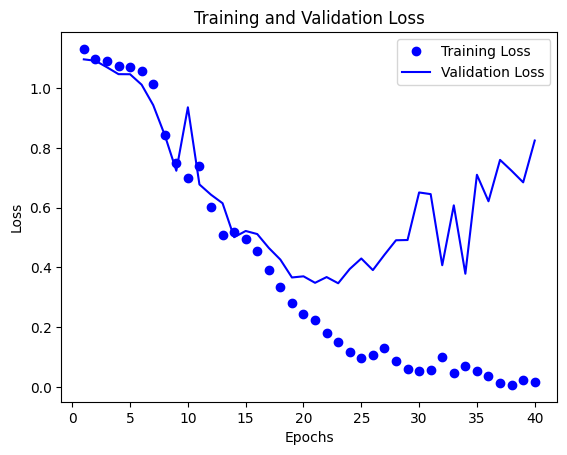

In [11]:
import matplotlib.pyplot as plt

def plot_loss(loss_value, val_loss_value):
    """
    Plots the training and validation loss over epochs.

    Parameters:
    loss_value (list): List of training loss values.
    val_loss_value (list): List of validation loss values.
    """
    epochs = range(1, len(loss_value) + 1)

    plt.plot(epochs, loss_value, 'bo', label='Training Loss')
    plt.plot(epochs, val_loss_value, 'b', label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()


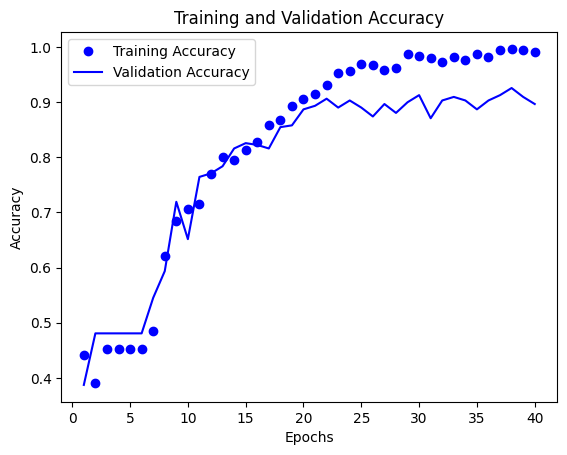

In [12]:
"""
Plots the training and validation accuracy over epochs.

Parameters:
- acc_values (list): List of training accuracy values.
- val_acc_values (list): List of validation accuracy values.
- epochs (list): List of epoch numbers.

Returns:
None
"""

acc_values = trained_model_dict['categorical_accuracy']
val_acc_values = trained_model_dict['val_categorical_accuracy']


plt.plot(epochs, acc_values, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc_values, 'b', label= 'Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()